# Énigme 3 : Le Dilemme de la Bibliothèque Quantique

Bob est victime d'un sortilège. Dans la Bibliothèque Mystique, il existe quatre manuscrits anciens, parmi lesquels un seul contient le sort de guérison. L'emprunt d'un livre se fait de manière aléatoire. Pour résoudre ce problème, Bob décide d'utiliser l'algorithme de Grover. Aika, la gardienne de ces écrits, marquera le manuscrit correct en modifiant sa phase quantique.

Problème posé : Déterminer une méthode efficace pour que Bob identifie le manuscrit salvateur

## Étape 1 : import des modules

In [1]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city
import numpy as np
import matplotlib.pyplot as plt

## Étape 2 : L'Orchestration des Harmonies Quantiques

Pour cette étape, Bob construit un circuit quantique de deux qubits. Il applique une porte Hadamard sur chacun, créant ainsi un état de superposition. Ces qubits représentent les choix possibles de grimoires dans la bibliothèque, et leur mise en superposition signifie que chaque qubit représente maintenant un grimoire de manière aléatoire.

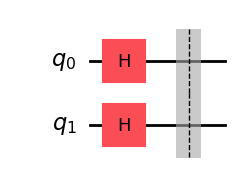

In [2]:
# Initialisation du circuit quantique
quantum_circuit = QuantumCircuit(2)

# Application de la porte de Hadamard sur les deux qubits
quantum_circuit.h(0)
quantum_circuit.h(1)

# Ajout d'une barrière pour séparer les étapes du circuit
quantum_circuit.barrier()

# Affichage du circuit
quantum_circuit.draw('mpl', style='iqp')

## Étape 3 : Simulation de l'Intervention d'Aïka par l'Oracle
L'oracle, qui représente l'action d'Aïka, est simulé par une porte Z. Cette porte réalise une rotation de 180 degrés autour de l'axe Z, changeant ainsi la phase de l'état |1>. En conséquence, l'oracle inverse la phase du Qbit, le transformant de + à - ou vice versa.

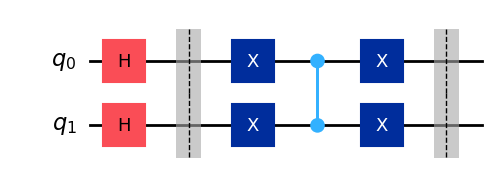

In [3]:
# Application des portes X et CZ pour l'intervention de l'Oracle
quantum_circuit.x([0, 1])
quantum_circuit.cz(0, 1)
quantum_circuit.x([0, 1])

# Ajout d'une barrière pour séparer les étapes du circuit
quantum_circuit.barrier()

# Affichage du circuit
quantum_circuit.draw('mpl', style='iqp')

Un diffuseur est utilisé pour superposer l'état initial sur tous les autres états en appliquant la phase inversée spécifique à chaque état.

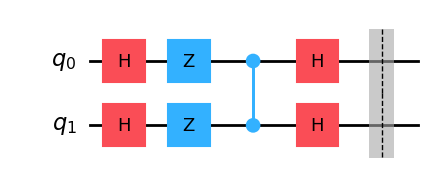

In [4]:
# Initialisation du circuit quantique avec 2 qubits
quantum_circuit = QuantumCircuit(2)

# Mise en superposition des qubits
quantum_circuit.h([0, 1])

# Application de l'Oracle et création d'intrication
quantum_circuit.z([0, 1])
quantum_circuit.cz(0, 1)

# Séparation des qubits et finalisation du circuit
quantum_circuit.h([0, 1])
quantum_circuit.barrier()

quantum_circuit.draw('mpl', style='iqp')


## Étape 4 : Mesure des Qubits

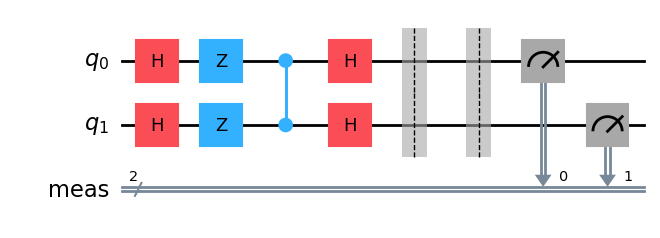

In [5]:
quantum_circuit.measure_all()
quantum_circuit.draw('mpl', style='iqp')

In [ ]:
# Choisir le simulateur 'statevector_simulator' depuis Aer
sim = Aer.get_backend('statevector_simulator')

# Adapter le circuit pour ce simulateur
circuit_adapt = transpile(quantum_circuit, sim)

# Lancer la simulation avec 10 000 itérations
sim_job = sim.run(circuit_adapt, shots=10000)

# Récupérer et afficher les résultats de la simulation
res = sim_job.result()
count = res.get_counts(circuit_adapt)

print(count)


## Étape : Présentation des Données Finales

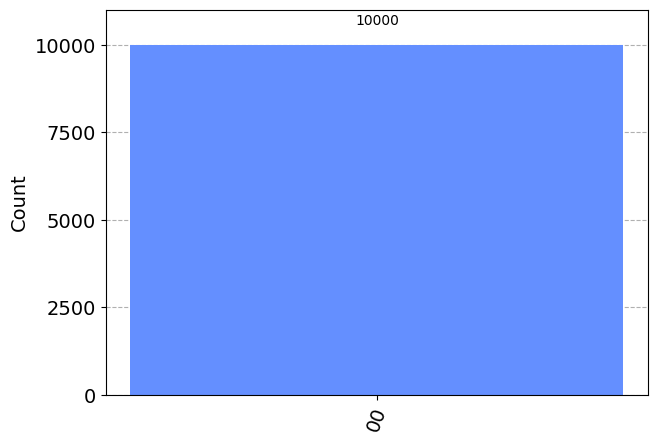

In [ ]:
# Création et affichage de l'histogramme des résultats
histogramme = plot_histogram(count)
histogramme.show()